## Hate Content Detection

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.svm import LinearSVC

In [2]:
#import dataset
data = pd.read_csv("labeled_data.csv")
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
data.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
Unnamed: 0            24783 non-null int64
count                 24783 non-null int64
hate_speech           24783 non-null int64
offensive_language    24783 non-null int64
neither               24783 non-null int64
class                 24783 non-null int64
tweet                 24783 non-null object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [5]:
#check correlation
data.corr()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
Unnamed: 0,1.000000,0.023947,-0.054345,0.043773,-0.005187,0.024525
count,0.023947,1.000000,0.101926,0.534604,0.063326,-0.010029
hate_speech,-0.054345,0.101926,1.000000,-0.261808,-0.157599,-0.515732
offensive_language,0.043773,0.534604,-0.261808,1.000000,-0.684406,-0.410440
neither,-0.005187,0.063326,-0.157599,-0.684406,1.000000,0.800687
class,0.024525,-0.010029,-0.515732,-0.410440,0.800687,1.000000


In [6]:
#inplace = apply changes in original dataset
data.rename(columns={'Unnamed: 0' : 'index'}, inplace=True)
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [22]:
#Removing unnecessary ! from tweets
data["tweet"] = data.tweet.str.replace("!", "")
data["tweet"] = data.tweet.str.replace("RT", "")
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,tweet_length
0,0,3,0,0,3,2,@mayasolovely: As a woman you shouldn't comp...,137
1,1,3,0,3,0,1,@mleew17: boy dats cold...tyga dwn bad for c...,78
2,2,3,0,3,0,1,@UrKindOfBrand Dawg @80sbaby4life: You ever...,109
3,3,3,0,2,1,1,@C_G_Anderson: @viva_based she look like a t...,53
4,4,6,0,6,0,1,@ShenikaRoberts: The shit you hear about me ...,124


In [23]:
# add tweet length column
data['tweet_length'] = data['tweet'].apply(len)
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,tweet_length
0,0,3,0,0,3,2,@mayasolovely: As a woman you shouldn't comp...,135
1,1,3,0,3,0,1,@mleew17: boy dats cold...tyga dwn bad for c...,76
2,2,3,0,3,0,1,@UrKindOfBrand Dawg @80sbaby4life: You ever...,105
3,3,3,0,2,1,1,@C_G_Anderson: @viva_based she look like a t...,51
4,4,6,0,6,0,1,@ShenikaRoberts: The shit you hear about me ...,122


## Basic Data visualizations

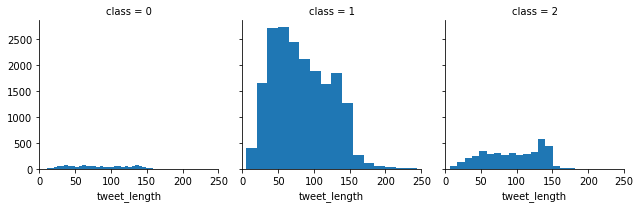

In [24]:
#FacetGrid
graph = sns.FacetGrid(data=data, col='class')
plt.xlim([0, 250])
graph.map(plt.hist, 'tweet_length', bins=50)

<p> Number of tweets seem to be skewed a lot higher towards the class=1 (offensive language)

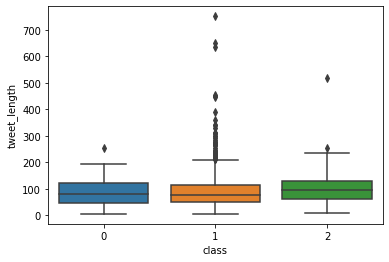

In [25]:
#Box-plot visvualization
sns.boxplot(x='class', y='tweet_length', data=data)

<p>class-1 tweets have much longer text. There are also outliers present so text-length won’t be a useful feature to consider.

([<matplotlib.axis.XTick at 0x20a4e85c148>,
 <a list of 3 Text xticklabel objects>)

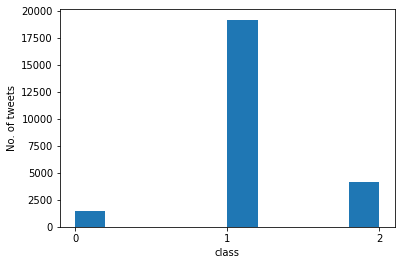

In [26]:
#histogram

class_min = data['class'].min()
class_max = data['class'].max()
data['class'].astype(str) # Prevents conversion to float
data['class'].hist()
plt.grid(False)
plt.xlabel('class')
plt.ylabel('No. of tweets')
plt.xticks(range(class_min, class_max + 1, 1))

<p> The above histogram shows that most of the tweets are considered to be offensive words by the CF coders.

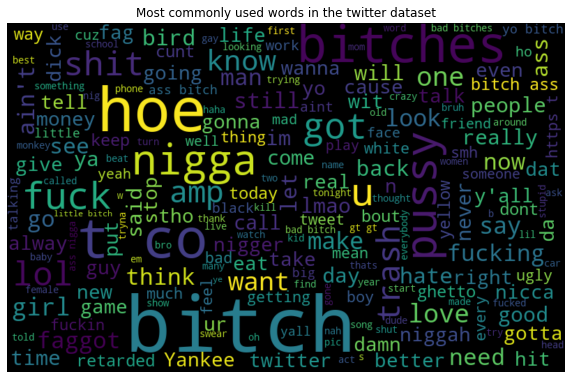

In [31]:
# visualizing which of the word is most commonly used in the twitter dataset
from wordcloud import WordCloud
# imshow-Display data as an image
all_words = ' '.join([text for text in data['tweet'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most commonly used words in the twitter dataset")
plt.show()

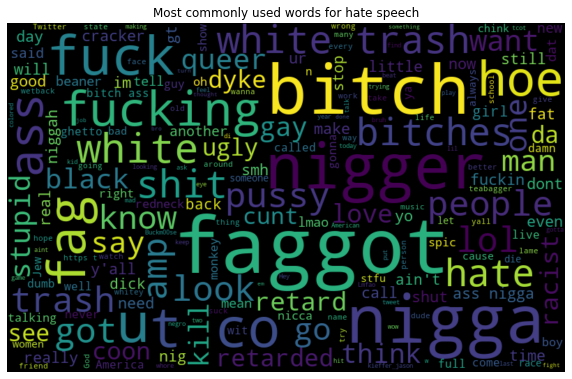

In [32]:
# visualizing which of the word is most commonly used for hatred speech
hatred_words = ' '.join([text for text in data['tweet'][data['class'] == 0]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(hatred_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most commonly used words for hate speech")
plt.show()

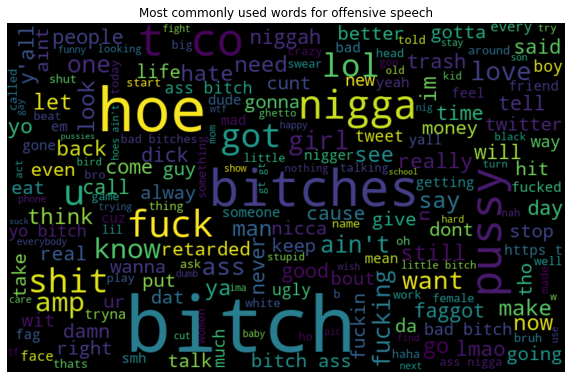

In [33]:
# visualizing which of the word is most commonly used for offensive speech
offensive_words = ' '.join([text for text in data['tweet'][data['class'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(offensive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most commonly used words for offensive speech")
plt.show()

### Feature Engineering

In [36]:
#TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify words in a set of documents.
#TF-IDF Features-F1

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(data['tweet'] )

## Running various model Using TFIDF

### Logistic Regression

In [43]:
X = tfidf
y = data['class'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)b
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.63      0.11      0.19       290
           1       0.89      0.97      0.93      3832
           2       0.85      0.73      0.79       835

    accuracy                           0.88      4957
   macro avg       0.79      0.61      0.64      4957
weighted avg       0.87      0.88      0.86      4957

Logistic Regression, Accuracy Score: 0.8829937462174703


### Random Forest Classifier

In [49]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.45      0.16      0.23       290
           1       0.88      0.96      0.92      3832
           2       0.83      0.67      0.74       835

    accuracy                           0.87      4957
   macro avg       0.72      0.60      0.63      4957
weighted avg       0.85      0.87      0.85      4957

Random Forest, Accuracy Score: 0.8668549525922937


### Naive Bayes

In [48]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_tfidf,y_train)
y_preds = nb.predict(X_test_tfidf)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.14      0.28      0.18       290
           1       0.87      0.83      0.85      3832
           2       0.64      0.55      0.59       835

    accuracy                           0.75      4957
   macro avg       0.55      0.55      0.54      4957
weighted avg       0.79      0.75      0.77      4957

Naive Bayes, Accuracy Score: 0.7482348194472463


### SVM

In [60]:
support=LinearSVC(random_state=20)
support.fit(X_train_tfidf,y_train)
y_preds = support.predict(X_test_tfidf)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.51      0.22      0.31       290
           1       0.92      0.96      0.94      3832
           2       0.84      0.82      0.83       835

    accuracy                           0.89      4957
   macro avg       0.75      0.67      0.69      4957
weighted avg       0.88      0.89      0.88      4957

SVM, Accuracy Score: 0.8928787573128909


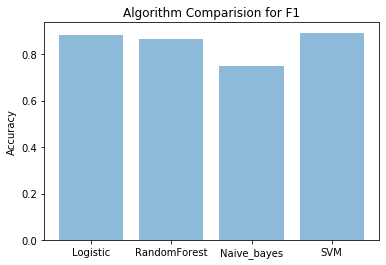

In [62]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1')
plt.show()